

# Aidan Goodfellow


### Define a function called det_qs, which implements the deterministic quick sort algorithm.

In [1]:
# Aidan Goodfellow

import unittest


def det_qs(arr):
    if len(arr) <= 1:
        return arr
    else:
        pivot = arr[0]
        less_than_pivot = [x for x in arr[1:] if x <= pivot]
        greater_than_pivot = [x for x in arr[1:] if x > pivot]
        return det_qs(less_than_pivot) + [pivot] + det_qs(greater_than_pivot)



### Define a function called random_qs, which implements the randomized quick sort algorithm.

In [2]:
import random

def random_qs(arr):
    if len(arr) <= 1:
        return arr
    else:
        # Randomly select a pivot
        pivot_index = random.randint(0, len(arr) - 1)
        pivot = arr[pivot_index]

        # Partition the array around the pivot
        less_than_pivot = [x for x in arr if x < pivot]
        equals_pivot = [x for x in arr if x == pivot]
        greater_than_pivot = [x for x in arr if x > pivot]

        return random_qs(less_than_pivot) + equals_pivot + random_qs(greater_than_pivot)



### Define a function called merge_sort, which implements the merge sort algorithm.

In [3]:
def merge_sort(arr):
    # Base case
    if len(arr) <= 1:
        return arr

    # Split the array
    mid = len(arr) // 2
    left_half = arr[:mid]
    right_half = arr[mid:]

    # sort both halves
    left_sorted = merge_sort(left_half)
    right_sorted = merge_sort(right_half)

    # Merge the sorted halves
    return merge(left_sorted, right_sorted)

def merge(left, right):
    merged = []
    left_index, right_index = 0, 0

    # Traverse both left and right arrays
    while left_index < len(left) and right_index < len(right):
        if left[left_index] < right[right_index]:
            merged.append(left[left_index])
            left_index += 1
        else:
            merged.append(right[right_index])
            right_index += 1

    # If there are remaining elements in the left array, add them to merged
    while left_index < len(left):
        merged.append(left[left_index])
        left_index += 1

    # If there are remaining elements in the right array, add them to merged
    while right_index < len(right):
        merged.append(right[right_index])
        right_index += 1

    return merged



### Benchmark the three functions defined above, i.e. time you function execution with inputs of different size. Draw a plot with x-axis being the size of input and y-axis being the time your functions take to finish given that input. The plot should contains six lines that corresponds to benchmarks of the three functions on two types of inputs.

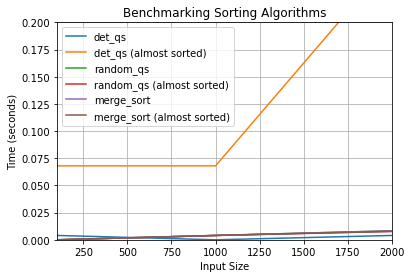

In [4]:
import random
import time
import matplotlib.pyplot as plt

# function tracking run-time
def time_sorting_function(func, arr):
    start_time = time.time()
    func(arr)
    return time.time() - start_time

def generate_random_array(n):
    return [random.randint(1, n) for _ in range(n)]

#generates a sorted array and switch the first element with second last
def generate_almost_sorted(n):
    arr = [x for x in range(n)]
    temp = 0
    temp = arr[0]
    arr[0] = arr[n-2]
    arr[n-2] = temp
    return arr

# save the sizes, functions, and labels in arrays so they can be accessed more easily
sizes = [100, 1000, 2000]
functions = [det_qs, random_qs, merge_sort]
labels = ["det_qs", "random_qs", "merge_sort"]

for func, label in zip(functions, labels):
    # empty list to track runtime
    times_list = []
    run_times_almost_sorted = []
    for size in sizes:
        random_array = generate_random_array(size)
        almost_sorted_array = generate_almost_sorted(size)
        
        run_time = time_sorting_function(func, random_array)
        run_time_almost_sorted = time_sorting_function(func, almost_sorted_array)
        
        times_list.append(run_time)
        run_times_almost_sorted.append(run_time_almost_sorted)
    
    plt.plot(sizes, times_list, label=f"{label}")
    plt.plot(sizes, run_times_almost_sorted, label=f"{label} (almost sorted)")

plt.xlabel('Input Size')
plt.xlim([100, 2000])
plt.ylabel('Time (seconds)')
plt.ylim([0,0.2])
plt.title('Benchmarking Sorting Algorithms')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
import numpy as np
import numpy.testing as npt

class Test_Sorting_Methods(unittest.TestCase):

    def test1(self):
        testarray = [random.randint(1, 1000) for _ in range(1000)]
        sorted_test = sorted(testarray)
        npt.assert_array_equal(det_qs(testarray), sorted(testarray), "arrays are not equal")

    def test2(self):
        testarray2 = [random.randint(1, 1000) for _ in range(1000)]
        sorted_test = sorted(testarray2)
        npt.assert_array_equal(random_qs(testarray2), sorted(testarray2), "arrays are not equal")

    def test3(self):
        testarray3 = [random.randint(1, 1000) for _ in range(1000)]
        sorted_test = sorted(testarray3)
        npt.assert_array_equal(merge_sort(testarray3), sorted(testarray3), "arrays are not equal")
 
for x in range(10):
    Test_Sorting_Methods.test1(unittest.TestCase)
    Test_Sorting_Methods.test2(unittest.TestCase)
    Test_Sorting_Methods.test3(unittest.TestCase)